# Instructions

Read carefully all the content in the cells, including the comments in the code cells

Some lines of code have been removed. You are asked to fill in the gaps.

Only modify lines that are between the following promts:

'# START YOUR CODE HERE >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

'# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> END YOUR CODE HERE

After each cell there will be a test cell that will allow you to be confident you will be able to continue with the execution of the notebook.

Here's an example

In [1]:
# This is just a test to illustrate how we will do exercises with jupyter notebooks

# This function adds two numbers and prints the result
# Please fill in the gaps

def print_sum(a,b):
    
    # START YOUR CODE HERE (1 line of code)>>>>>>>>>>>>>>>>>>
    c = a 
    c = c + b
    # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> END YOUR CODE HERE
    
    print(c)
    
    return

In [2]:
# Run this cell to check that the above implementation is correct
print_sum(1,2)

3


**Expected Output**: 
<table style = "width:40%">
    <tr>
    <td>** print_sum(1,2) **</td> 
        <td>3 </td> 
    </tr>

</table>

# Cosmography

In this notebook we are going to implement some functions to compute the obsevables we have discussed during the lecture.

To do so, we will expand the cosmology class we started coding in the previous class.

We will start by reviewing the implementation we had, which allowed us to compute the age of the universe.

We will add a couple of attributes to the cosmology that will make our code cleaner: the Hubble time and distance:

$$t_H = \frac{1}{H_0}$$
$$D_H = \frac{c}{H_0}$$

These characteristic time and distance are relevant, because all the times and distances we will compute scale with them. Also, they can be directly measured through the Hubble constant, and they will allow to handle units easily (we can compute dimensionless quantities, and then give them units by multiplying them by the appropriate characteristic quantity).

We will also add a very simple function to compute the look back time to a galaxy. When a piece of news reports that atronomers have observed light comming from a galaxy many millions of years ago, they refer to the look back time. It is just the difference between the age of the univese when the light is collected (today) and the age of the universe when the light was emitted:

$$t_{lookback} = t_{reception} - t_{emission}$$

Use the age function in the cosmology class to implement that function

In [3]:
import astropy.units as u           # we will use this library to handle units
from astropy.constants import c     # speeed of light
from scipy.integrate import quad    # only needed if we use quad function for integral
import numpy as np

class FLRWcosmo:
    '''Class for cosmological model representing a uniform and isotropic universe described by GR'''
    
    def __init__(self, Om_0, Or_0, Ol_0, H_0=72*u.km/u.s/u.Mpc):
        # Since the uncertainty on the Hubble constant is not too big, we can 
        # add a default value for it
        # Feel free to modify the class and add default values for your favourite model
        self.Om_0 = Om_0
        self.Or_0 = Or_0
        self.Ol_0 = Ol_0
        self.Ok_0 = 1 - self.Om_0 - self.Or_0 - self.Ol_0
        self.H_0  = H_0
        
        # Derived parameters that will be used to normalize distances
#        from astropy.constants import c
        self.t_H = (1 / self.H_0).to(u.Gyr).value     # Hubble time in Gyr
        self.D_H = (c / self.H_0).to(u.Mpc).value   # Hubble radius in Mpc
        
    # Scaling of enery densities per component at scale factor a
    def Om(self, a):
        '''Non-relativistic matter energy density in units of critical density at a=1'''       
        omega_m = self.Om_0 / a**3 
        return omega_m
    
    def Or(self, a):
        '''Radiation energy density in units of critical density at a=1'''
        omega_r = self.Or_0 / a**4
        return omega_r
    
    def Ol(self, a):
        '''Cosmological constant energy density in unist of critical density at a=1'''
        omega_l = self.Ol_0 
        return omega_l
    
    def Ok(self, a):
        '''Curvature energy density in units of critical density at a=1'''
        omega_k = self.Ok_0 / a**2
        return omega_k
    
    def Omega(self, a):
        '''Total energy density in units of critical density at a=1'''
        omega = self.Om(a) + self.Or(a) + self.Ol(a) + self.Ok(a)
        return omega
    
    def E(self, a):
        '''Square root of energy density, enters Friedmann's equation'''
        
        E = self.Omega(a)**0.5
        
        return E
    
    # Ages
    def age(self, a):
        '''Age of the universe, in Gyr by integrating the Friedman's equation'''
        
        # implement the integral for chi
        def integrand(x):
            '''Computes the integrand, for chi given scale factor x'''
            
            integ = 1 / x / self.E(x)
            
            return integ
        
        # perform the integral
        
        chi = quad(integrand, 0, a)[0]
        
        # scale with Hubble time, bringing back units in Gyr
        
        age = self.t_H * chi
        
        return age
    
    def look_back_time(self, a):
        '''Returns lookback time to an object at scale factor a'''
        
        # START YOUR CODE HERE (2 lines of code)>>>>>>>>>>>>>>>>>>
        t_0 = self.age(1)
        t_e = self.age(a)
        # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> END YOUR CODE HERE
        
        return t_0 - t_e

In [4]:
# Now let's test the implementation:
cosmo = FLRWcosmo(Om_0=0.3, Or_0=0, Ol_0=0.7)
print(cosmo.look_back_time(0.5))

7.5010220867877795


**Expected Output**: 
<table style = "width:40%">
    <tr>
    <td>** print(cosmo.look_back_time(0.5)) **</td> 
        <td> 7.5010220867877795 </td> 
    </tr>

</table>

Age of the universe is 13.088189136108339 Gyr


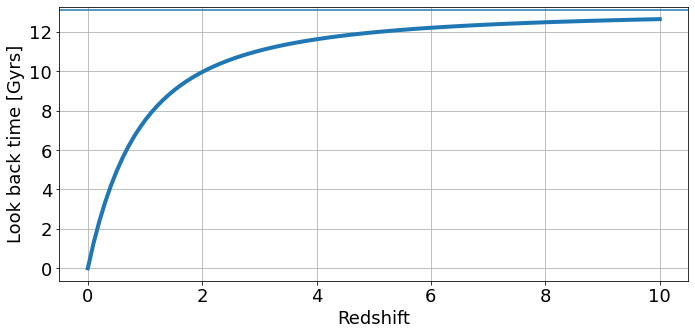

In [5]:
# Let's see how the look back time changes with redshift
# Most galaxies exhibit moderate values for redshift
# The most distant galaxy we know has a redshift of 11.1
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Get an array with the scale factors we want to compute the lookback time to
redshifts = np.linspace(0, 10, 100)
scale_factors = 1 / (1 + redshifts)

# Initialize a cosmology with some reasonable parameters
cosmo = FLRWcosmo(Om_0=0.3,  Or_0=8.4e-5, Ol_0=0.7, H_0=72 * u.km / u.s / u.Mpc)

# Compute the lookback times to those scale factors
# START YOUR CODE HERE (1 line of code)>>>>>>>>>>>>>>>>>>
tlooks = np.array([cosmo.look_back_time(a) for a in scale_factors])
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> END YOUR CODE HERE
current_age = cosmo.age(1)
print("Age of the universe is {} Gyr".format(current_age))

# Make a plot
matplotlib.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(10,5))
ax  = fig.add_subplot(1,1,1)
ax.plot(redshifts, tlooks, linewidth=4)
ax.axhline(current_age)
ax.set_xlabel(r"Redshift"), ax.set_ylabel(r"Look back time [Gyrs]")
ax.grid()
plt.tight_layout()

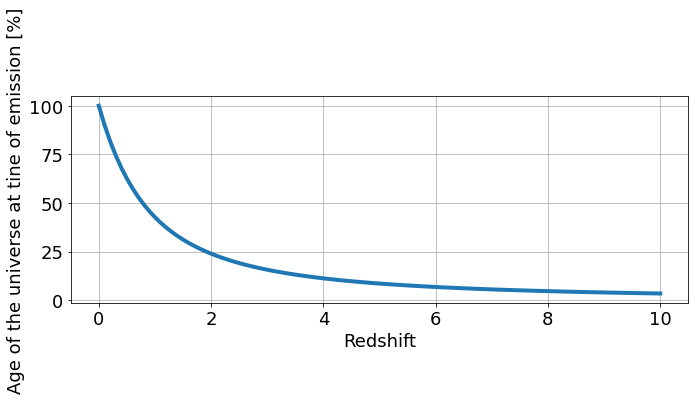

In [6]:
# Often tines, the newspapers like to say things like "The univserse had only 10% of its age"
# when the light left that galaxy

# We can also plot that quantity
age = cosmo.age(1)
ages = np.array([cosmo.age(a) for a in scale_factors])
percent_ages = 100 * ages / age

# Make a plot
matplotlib.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(10,5))
ax  = fig.add_subplot(1,1,1)
ax.plot(redshifts, percent_ages, linewidth=4)
ax.set_xlabel(r"Redshift"), ax.set_ylabel(r"Age of the universe at tine of emission [%]")
ax.grid()
plt.tight_layout()

## Distances

Let's start implementing distances, we will follow this paper for reference:

https://arxiv.org/pdf/astro-ph/9905116.pdf
 
You may want to have it opened in a tab for reference.

We will start with the comoving radial distance (line-of-sight according to Hogg's paper). The equation from Hoog's reads:

$$D_C = D_H \int_0^z \frac{dz}{E(z)}$$

We will use the scale factor as a variable, not the redshift (the choice is not that important), so we need to change variables.

Remember from the lectures, that from the definition of redshift:

$$dz = - \frac{da}{a^2}$$

And so, the above equation turns into:

$$D_C = D_H \int_1^a \frac{da}{a^2E(a)}$$

To compute it, we just need to do the integral, and then multiply the result by the Hubble distance, which we have already added to the class as an attribute.

We are going to avoid creating our own integration function (the less you code yourself, the fewer bugs your code will have, always try to re-use tested libraries whenever possible). You can use the quad function in the scipy library:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html

Since the functions we are going to integrate are quite simple, we can make our code very compact using what in Python are called "lambda" functions. These are functions that are defined when they are needed, in a line, and we do not give them name (we will not call them anywhere else. The syntax is:

lambda variable : f(variable)

In [7]:
# This is an example of how to use lambdas
# These are equivalent implementations:

def add_constant(x, constant):
    return x + constant

def square_after_adding_constant(x, constant):
    return add_constant(x, constant)**2

def square_after_adding_constant_bis(x, constant):
    y = lambda a : a + constant
    return y(x)**2

# Check that you get the same result
print(square_after_adding_constant(1,1) == square_after_adding_constant_bis(1,1))

True


If the use of lambda is confusing, or you find the use of the quad function confusing, feel free to implement
the above formula in any way that works for you

In [8]:
import astropy.units as u           # we will use this library to handle units
from astropy.constants import c     # speeed of light
from scipy.integrate import quad    # only needed if we use quad function for integral
import numpy as np

class FLRWcosmo:
    '''Class for cosmological model representing a uniform and isotropic universe described by GR'''
    
    def __init__(self, Om_0, Or_0, Ol_0, H_0=72*u.km/u.s/u.Mpc):
        # Since the uncertainty on the Hubble constant is not too big, we can 
        # add a default value for it
        # Feel free to modify the class and add default values for your favourite model
        self.Om_0 = Om_0
        self.Or_0 = Or_0
        self.Ol_0 = Ol_0
        self.Ok_0 = 1 - self.Om_0 - self.Or_0 - self.Ol_0
        self.H_0  = H_0
        
        # Derived parameters that will be used to normalize distances
#        from astropy.constants import c
        self.t_H = (1 / self.H_0).to(u.Gyr).value     # Hubble time in Gyr
        self.D_H = (c / self.H_0).to(u.Mpc).value   # Hubble radius in Mpc
        
    # Scaling of enery densities per component at scale factor a
    def Om(self, a):
        '''Non-relativistic matter energy density in units of critical density at a=1'''       
        omega_m = self.Om_0 / a**3 
        return omega_m
    
    def Or(self, a):
        '''Radiation energy density in units of critical density at a=1'''
        omega_r = self.Or_0 / a**4
        return omega_r
    
    def Ol(self, a):
        '''Cosmological constant energy density in unist of critical density at a=1'''
        omega_l = self.Ol_0 
        return omega_l
    
    def Ok(self, a):
        '''Curvature energy density in units of critical density at a=1'''
        omega_k = self.Ok_0 / a**2
        return omega_k
    
    def Omega(self, a):
        '''Total energy density in units of critical density at a=1'''
        omega = self.Om(a) + self.Or(a) + self.Ol(a) + self.Ok(a)
        return omega
    
    def E(self, a):
        '''Square root of energy density, enters Friedmann's equation'''
        
        E = self.Omega(a)**0.5
        
        return E
    
    # Ages
    def age(self, a):
        '''Age of the universe, in Gyr by integrating the Friedman's equation'''
        
        # implement the integral for chi
        def integrand(x):
            '''Computes the integrand, for chi given scale factor x'''
            
            integ = 1 / x / self.E(x)
            
            return integ
        
        # perform the integral
        
        chi = quad(integrand, 0, a)[0]
        
        # scale with Hubble time, bringing back units in Gyr
        
        age = self.t_H * chi
        
        return age
    
    def look_back_time(self, a):
        '''Returns lookback time to an object at scale factor a'''
        
        # START YOUR CODE HERE (2 lines of code)>>>>>>>>>>>>>>>>>>
        t_0 = self.age(1)
        t_e = self.age(a)
        # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> END YOUR CODE HERE
        
        return t_0 - t_e
    
    # Distances
    # Implements formulae from Hogg 2001: https://arxiv.org/pdf/astro-ph/9905116.pdf
    def comoving_radial_distance(self, a):
        '''Returns comoving radial distance to object at scale factor a in Mpc'''
        
        # START YOUR CODE HERE (2 lines of code)>>>>>>>>>>>>>>>>>>
        D_C = self.D_H * quad(lambda x: 1 / x**2 / self.E(x), a, 1)[0]
        # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> END YOUR CODE HERE
        
        return D_C

In [9]:
# Test the implementation of the comoving_radial_distance
cosmo = FLRWcosmo(Om_0=0.3, Or_0=0, Ol_0=0.7)
print(cosmo.comoving_radial_distance(0.5))

3212.0557835017053


**Expected Output**: 
<table style = "width:40%">
    <tr>
    <td>** print(cosmo.comoving_radial_distance(0.5)) **</td> 
        <td> 3212.0557835017053 </td> 
    </tr>

</table>

We will add to the implementation the comoving trasverse distance:
$$\Omega_k > 0 \rightarrow D_M = D_C \frac{1}{\sqrt{\Omega_k}}\sinh\left(\sqrt{\Omega_k}\frac{D_C}{D_H}\right)$$
$$\Omega_k 0 0 \rightarrow D_M = D_C $$
$$\Omega_k < 0 \rightarrow D_M = D_C \frac{1}{\sqrt{-\Omega_k}}\sin\left(\sqrt{-\Omega_k}\frac{D_C}{D_H}\right)$$

You don't need to do anything, I have implemented it for you:


In [10]:
import astropy.units as u           # we will use this library to handle units
from astropy.constants import c     # speeed of light
from scipy.integrate import quad    # only needed if we use quad function for integral
import numpy as np

class FLRWcosmo:
    '''Class for cosmological model representing a uniform and isotropic universe described by GR'''
    
    def __init__(self, Om_0, Or_0, Ol_0, H_0=72*u.km/u.s/u.Mpc):
        # Since the uncertainty on the Hubble constant is not too big, we can 
        # add a default value for it
        # Feel free to modify the class and add default values for your favourite model
        self.Om_0 = Om_0
        self.Or_0 = Or_0
        self.Ol_0 = Ol_0
        self.Ok_0 = 1 - self.Om_0 - self.Or_0 - self.Ol_0
        self.H_0  = H_0
        
        # Derived parameters that will be used to normalize distances
#        from astropy.constants import c
        self.t_H = (1 / self.H_0).to(u.Gyr).value     # Hubble time in Gyr
        self.D_H = (c / self.H_0).to(u.Mpc).value   # Hubble radius in Mpc
        
    # Scaling of enery densities per component at scale factor a
    def Om(self, a):
        '''Non-relativistic matter energy density in units of critical density at a=1'''       
        omega_m = self.Om_0 / a**3 
        return omega_m
    
    def Or(self, a):
        '''Radiation energy density in units of critical density at a=1'''
        omega_r = self.Or_0 / a**4
        return omega_r
    
    def Ol(self, a):
        '''Cosmological constant energy density in unist of critical density at a=1'''
        omega_l = self.Ol_0 
        return omega_l
    
    def Ok(self, a):
        '''Curvature energy density in units of critical density at a=1'''
        omega_k = self.Ok_0 / a**2
        return omega_k
    
    def Omega(self, a):
        '''Total energy density in units of critical density at a=1'''
        omega = self.Om(a) + self.Or(a) + self.Ol(a) + self.Ok(a)
        return omega
    
    def E(self, a):
        '''Square root of energy density, enters Friedmann's equation'''
        
        E = self.Omega(a)**0.5
        
        return E
    
    # Ages
    def age(self, a):
        '''Age of the universe, in Gyr by integrating the Friedman's equation'''
        
        # implement the integral for chi
        def integrand(x):
            '''Computes the integrand, for chi given scale factor x'''
            
            integ = 1 / x / self.E(x)
            
            return integ
        
        # perform the integral
        
        chi = quad(integrand, 0, a)[0]
        
        # scale with Hubble time, bringing back units in Gyr
        
        age = self.t_H * chi
        
        return age
    
    def look_back_time(self, a):
        '''Returns lookback time to an object at scale factor a'''
        
        # START YOUR CODE HERE (2 lines of code)>>>>>>>>>>>>>>>>>>
        t_0 = self.age(1)
        t_e = self.age(a)
        # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> END YOUR CODE HERE
        
        return t_0 - t_e
    
    # Distances
    # Implements formulae from Hogg 2001: https://arxiv.org/pdf/astro-ph/9905116.pdf
    def comoving_radial_distance(self, a):
        '''Returns comoving radial distance to object at scale factor a in Mpc'''
        
        # START YOUR CODE HERE (1 line of code)>>>>>>>>>>>>>>>>>>
        D_C = self.D_H * quad(lambda x: 1 / x**2 / self.E(x), a, 1)[0]
        # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> END YOUR CODE HERE
        
        return D_C
    
    def comoving_transverse_distance(self, a):
        '''Returns transverse comoving distance to objec at scale factor a in Mpc'''
        
        if self.Ok_0 > 0:
            
            D_M = self.D_H  / self.Ok_0**0.5 * np.sinh(self.Ok_0**0.5 * self.comoving_radial_distance(a) / self.D_H)
        
        elif self.Ok_0 == 0:
            
            D_M = self.comoving_radial_distance(a)
       
        else:
            
            D_M = self.D_H / (-self.Ok_0)**0.5 * np.sin((-self.Ok_0)**0.5 * self.comoving_radial_distance(a) / self.D_H)
            
        return D_M

Now, let's implement the luminosity and angular diameter distances.

+ For the luminosity distance, we have:

$$D_L = (1+z) D_M$$

Again, we will work with scale factors instead of redshifts:

$$D_L = \frac{D_M}{a}$$

+ For the angular diameter distance, we are given two formulae, depending on whether we are interested in the angular diameter distance to one object, or that between two objects. The latter is quite useful for computations involving gravitational lensing, so let's implement both formulae with the same function:

$$D_A = \frac{D_M}{1+z} = a D_M$$

$$D_{A12} = \frac{1}{1+z_2}\left[D_{M2}\sqrt{1 + \Omega_k\frac{D_{M1}^2}{D_H^2}} - D_{M1}\sqrt{1+\Omega_k\frac{D_{M2}^2}{D_H^2}}\right] = a_2 \left[D_{M2}\sqrt{1 + \Omega_k\frac{D_{M1}^2}{D_H^2}} - D_{M1}\sqrt{1+\Omega_k\frac{D_{M2}^2}{D_H^2}}\right]$$

+ Implement those two functions in the class:

In [11]:
import astropy.units as u           # we will use this library to handle units
from astropy.constants import c     # speeed of light
from scipy.integrate import quad    # only needed if we use quad function for integral
import numpy as np

class FLRWcosmo:
    '''Class for cosmological model representing a uniform and isotropic universe described by GR'''
    
    def __init__(self, Om_0, Or_0, Ol_0, H_0=72*u.km/u.s/u.Mpc):
        # Since the uncertainty on the Hubble constant is not too big, we can 
        # add a default value for it
        # Feel free to modify the class and add default values for your favourite model
        self.Om_0 = Om_0
        self.Or_0 = Or_0
        self.Ol_0 = Ol_0
        self.Ok_0 = 1 - self.Om_0 - self.Or_0 - self.Ol_0
        self.H_0  = H_0
        
        # Derived parameters that will be used to normalize distances
#        from astropy.constants import c
        self.t_H = (1 / self.H_0).to(u.Gyr).value     # Hubble time in Gyr
        self.D_H = (c / self.H_0).to(u.Mpc).value   # Hubble radius in Mpc
        
    # Scaling of enery densities per component at scale factor a
    def Om(self, a):
        '''Non-relativistic matter energy density in units of critical density at a=1'''       
        omega_m = self.Om_0 / a**3 
        return omega_m
    
    def Or(self, a):
        '''Radiation energy density in units of critical density at a=1'''
        omega_r = self.Or_0 / a**4
        return omega_r
    
    def Ol(self, a):
        '''Cosmological constant energy density in unist of critical density at a=1'''
        omega_l = self.Ol_0 
        return omega_l
    
    def Ok(self, a):
        '''Curvature energy density in units of critical density at a=1'''
        omega_k = self.Ok_0 / a**2
        return omega_k
    
    def Omega(self, a):
        '''Total energy density in units of critical density at a=1'''
        omega = self.Om(a) + self.Or(a) + self.Ol(a) + self.Ok(a)
        return omega
    
    def E(self, a):
        '''Square root of energy density, enters Friedmann's equation'''
        
        E = self.Omega(a)**0.5
        
        return E
    
    # Ages
    def age(self, a):
        '''Age of the universe, in Gyr by integrating the Friedman's equation'''
        
        # implement the integral for chi
        def integrand(x):
            '''Computes the integrand, for chi given scale factor x'''
            
            integ = 1 / x / self.E(x)
            
            return integ
        
        # perform the integral
        
        chi = quad(integrand, 0, a)[0]
        
        # scale with Hubble time, bringing back units in Gyr
        
        age = self.t_H * chi
        
        return age
    
    def look_back_time(self, a):
        '''Returns lookback time to an object at scale factor a'''
        
        # START YOUR CODE HERE (2 lines of code)>>>>>>>>>>>>>>>>>>
        t_0 = self.age(1)
        t_e = self.age(a)
        # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> END YOUR CODE HERE
        
        return t_0 - t_e
    
    # Distances
    # Implements formulae from Hogg 2001: https://arxiv.org/pdf/astro-ph/9905116.pdf
    def comoving_radial_distance(self, a):
        '''Returns comoving radial distance to object at scale factor a in Mpc'''
        
        # START YOUR CODE HERE (1 line of code)>>>>>>>>>>>>>>>>>>
        D_C = self.D_H * quad(lambda x: 1 / x**2 / self.E(x), a, 1)[0]
        # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> END YOUR CODE HERE
        
        return D_C
    
    def comoving_transverse_distance(self, a):
        '''Returns transverse comoving distance to objec at scale factor a in Mpc'''
        
        if self.Ok_0 > 0:
            
            D_M = self.D_H  / self.Ok_0**0.5 * np.sinh(self.Ok_0**0.5 * self.comoving_radial_distance(a) / self.D_H)
        
        elif self.Ok_0 == 0:
            
            D_M = self.comoving_radial_distance(a)
       
        else:
            
            D_M = self.D_H / (-self.Ok_0)**0.5 * np.sin((-self.Ok_0)**0.5 * self.comoving_radial_distance(a) / self.D_H)
            
        return D_M
    
    def luminosity_distance(self, a):
        '''Returns luminosity distance to object at scale factor a in Mpc'''
        
        # START YOUR CODE HERE (1 line of code)>>>>>>>>>>>>>>>>>>
        D_L = self.comoving_transverse_distance(a) / a
        # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> END YOUR CODE HERE
        
        return D_L
    
    def angular_diameter_distance(self, a_1, a_2=None):
        '''Returns angular diameter distance between two objects at scale factors a_1 and a_2,
        if only one scale factor is given, returns angular diameter distance between object and observer
        at a=1, in Mpc'''
        
        if a_2 is None:
            
            # START YOUR CODE HERE (1 line of code)>>>>>>>>>>>>>>>>>>
            D_A = self.comoving_transverse_distance(a_1) * a_1
            # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> END YOUR CODE HERE        
            
        else:
            
            # START YOUR CODE HERE (3 lines of code)>>>>>>>>>>>>>>>>>>
            D_M1 = self.comoving_radial_distance(a_1)
            D_M2 = self.comoving_radial_distance(a_2)
            D_A = a_2 * (D_M2 * (1 + self.Ok_0 * (D_M1 / self.D_H)**2)**0.5 - 
                         D_M1 * (1 + self.Ok_0 * (D_M2 / self.D_H)**2)**0.5)
            # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> END YOUR CODE HERE 
            
        return D_A 

In [12]:
# Test the implementation of the luminosity distance
cosmo = FLRWcosmo(Om_0=0.3, Or_0=0, Ol_0=0.7)
print(cosmo.luminosity_distance(0.5))

6424.1115670034105


**Expected Output**: 
<table style = "width:40%">
    <tr>
    <td>** print(cosmo.luminosity_distance(0.5)) **</td> 
        <td> 6424.1115670034105 </td> 
    </tr>

</table>

In [13]:
# Test the implementation of the angular diameter distance
cosmo = FLRWcosmo(Om_0=0.3, Or_0=0, Ol_0=0.7)
print(cosmo.angular_diameter_distance(0.5))

1606.0278917508526


**Expected Output**: 
<table style = "width:40%">
    <tr>
    <td>** print(cosmo.angular_diameter_distance(0.5)) **</td> 
        <td> 1606.0278917508526 </td> 
    </tr>

</table>

In [14]:
# Now we can do (and animate) a plot similar to the ones seen in class
# First, let's define a reference cosmology
cosmo_ref = FLRWcosmo(Om_0=0.3,  Or_0=8.4e-5, Ol_0=0.7, H_0=72 * u.km / u.s / u.Mpc)

# Define the redshifts we want to look at
z_s = np.linspace(0, 6, 100)

# The scale factors are then
a_s = 1 / (1 + z_s)

# Compute luminosity and angular diameters distances for reference cosmology

# START YOUR CODE HERE (2 lines of code)>>>>>>>>>>>>>>>>>>
DL_ref = np.array([cosmo_ref.luminosity_distance(a) for a in a_s])
DA_ref = np.array([cosmo_ref.angular_diameter_distance(a) for a in a_s])
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> END YOUR CODE HERE 

# Define function that generates the plot
def f(om_0, ol_0):
    # initialize new cosmology
    cosmo = FLRWcosmo(Om_0=om_0, Or_0=cosmo_ref.Or_0, Ol_0=ol_0, H_0=cosmo_ref.H_0)
    # compute luminosity distance for new cosmology
    DL = np.array([cosmo.luminosity_distance(a) for a in a_s])
    DA = np.array([cosmo.angular_diameter_distance(a) for a in a_s])
    # plot both to compare
    matplotlib.rcParams.update({'font.size':18})
    fig = plt.figure(figsize=(20,10))
    # Plot luminosity distance
    ax = fig.add_subplot(1,2,1)
    ax2 = ax.twiny()
    ax.plot(z_s, DL_ref / cosmo_ref.D_H, 'k--', linewidth=2, label=r"Ref cosmology")
    ax.plot(z_s, DL / cosmo_ref.D_H,     'b-',  linewidth=2, label=r"New cosmology")
    ax.set_xlabel(r"Redshift"), ax.set_ylabel(r"Luminosity distance [$D_H$]")
    ax2.set_xlabel(r"Scale factor")
    ax.set_ylim((0,18))
    ax2.plot(a_s, z_s, alpha=0), ax2.invert_xaxis()
    ax.legend(loc=2)
    ax.grid()
    # Plot angular diameter distance
    ax = fig.add_subplot(1,2,2)
    ax2 = ax.twiny()
    ax.plot(z_s, DA_ref / cosmo_ref.D_H, 'k--', linewidth=2, label=r"Ref cosmology")
    ax.plot(z_s, DA / cosmo_ref.D_H,     'b-',  linewidth=2, label=r"New cosmology")
    ax.set_xlabel(r"Redshift"), ax.set_ylabel(r"Angular diameter distance [$D_H$]")
    ax2.set_xlabel(r"Scale factor")
    ax.set_ylim((0,1))
    ax2.plot(a_s, z_s, alpha=0), ax2.invert_xaxis()
    ax.legend(loc=2)
    ax.grid()
    
    
    plt.tight_layout()
    plt.show()

In [15]:
# Output interactive plot
from ipywidgets import interactive

interactive_plot = interactive(f, om_0=(0, 1, 0.1), ol_0=(0,1,0.1))
output           = interactive_plot.children[-1]
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='om_0', max=1.0), FloatSlider(value=0.0, description=…